# Branching Processes 

What are general patterns we might expect when a population grows out of a single cell?

One of the most basic question is to characterize how a population grows over time. Deterministically, we expect exponential growth if prolifertion at rate $a$ exceeds the rate $b$ of death. In many cases, both quantities are similar, for example in an epidemic situation where $R_0$ is about 1, or for a slightly beneficial mutaiton in a population going through generations. In these near critical cases, it is not obvious whether a population survives rather than goes extinct by chance and, if it survives, what population size distribution on might expect. 

N.B.: A very nice presentation of most of the ideas in this write-up can be found in reference {cite}`desai2007beneficial`.

## Survival probability

To answer this question, let's first focus on the probability $u(t|\tau)$ that an individual present at time $\tau$ leaves some descendants at time $t$. 

Suppose, we already know $u(t|\tau)$ and would like to estimate $u(t|\tau-\epsilon)$, i.e. pushing the initial condition further back in time. Then, if the time slice $\epsilon$ is sufficiently small, we only have to consider two possible events, birth with probability $\epsilon a$, or death with probability $\epsilon b$, as the probability of double events is of order $\epsilon^2$. Thus, we can estimate

$$ 
u(t|\tau-\epsilon)=\left[1-\epsilon (a+b)\right] u(t|\tau)+\epsilon a \left[1-(1-u(t|\tau))^2\right] 
$$  (br-process-1)

Here, the first term on the right hand side simply says that, conditional on no death or birth event occurs within the time span $\epsilon$, the probability of survival remains unchanged. 

$$ 
-\partial_\tau u = (a-b) u - a u^2. 
$$

Notice that, if the birth and death rates are time dependent, they have to be evaluated at the initial time $\tau$.
For simplicity, we assume the relative growth rate difference $s\equiv (a-b)/a\ll1$ is constant and small. 

If we further measure time in generations, $\tau\to \tau/a$, we obtain 
    
$$ 
-\partial_\tau u = s u - u^2. 
$$ (logistic-eqn)

The resulting equation {eq}`logistic-eqn` is a logistic differential equation. Although seemingly non-linear, this equation reveals its linear nature after the following substituting $u(\tau)=\frac {s }{1-q(\tau)^{-1}}$, upon which we obtain 

$$
-\partial_\tau q(\tau)=s q(\tau) \;.
$$

This linear equation for the fraction $q(t)\equiv \frac u{u-s}$ has the solution $q(\tau)=q(t)e^{s(t-\tau)}$. Using the initial condition $q(t)=\frac 1{1-s}$, we obtain for the survival probability

$$
u(t|\tau)=\frac{s}{1-(1-s)e^{s(\tau-t)}}=u(t-\tau)\;.
$$

Note, that our final result only depends on the time difference, provided that birth and death rates are time-dependent.

```{note}
The long-term survival probability of a super critical branching process is given by the relative growth rate difference between birth and death rate, $s=(a-b)/a$. 
```

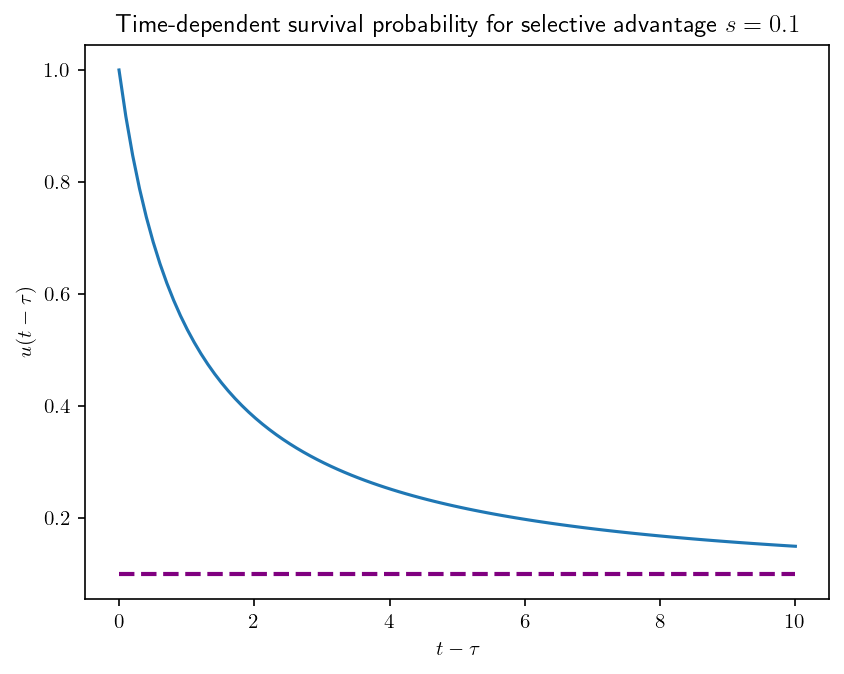

In [19]:

import numpy as np
import matplotlib.pyplot as plt
# allow TeX
plt.rcParams['text.usetex'] = True
plt.figure(dpi=150)

s = 0.1
tmax = 10
t = np.linspace(start=0, stop=tmax, num=100)
y = s/(1-(1-s)*np.exp(-s*t)) 

# Add title and axis names
plt.title(r'Time-dependent survival probability for selective advantage $s = 0.1$')
plt.xlabel(r'$t- \tau $')
plt.ylabel(r'$u(t-\tau)$')

plt.hlines(y = s, xmin= 0 , xmax=tmax, colors='purple', linestyles='--', lw=2, label='s')

plt.plot(t, y)
plt.show()

From the linear first moment equation, $\partial_t \langle N(t)\rangle=s \langle N(t)\rangle$, it is clear that the expectation of the abundance as a function of time is a simple exponential, $\langle N(t) \rangle =e^{st}$, which is the solution to the averaged.

But now, with the survival probability at hand, we can also predict the expected abundance given survival, because $\langle N(t)\rangle=u(t)\langle N(t)|\text{survival} \rangle$, or

$$
    \langle N(t)|N(t)\geq1 \rangle =\frac{e^{st}}{u(t)}=1+\frac{e^{s t}-1}{s}
$$  (mean abundance)


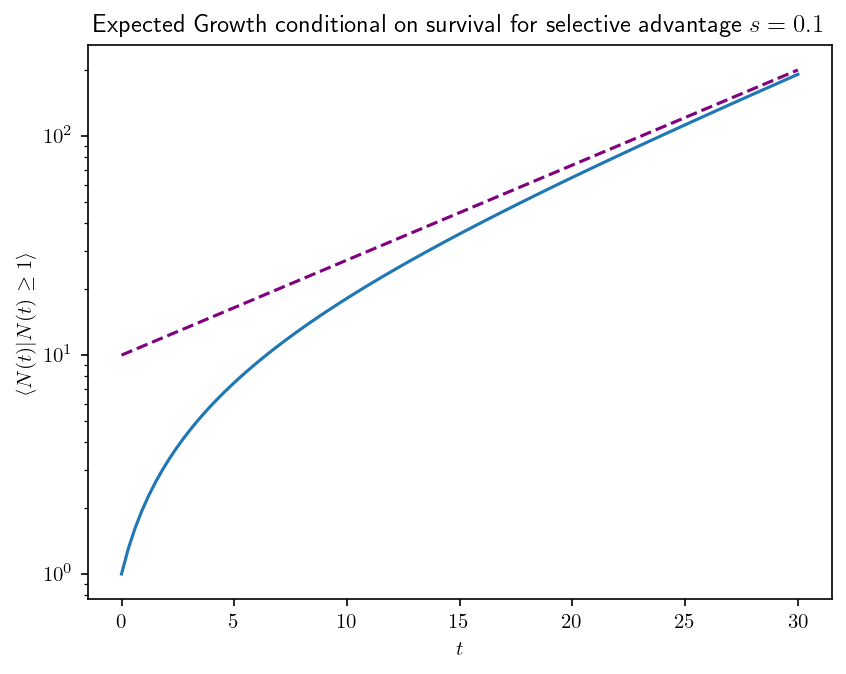

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# allow TeX
plt.rcParams['text.usetex'] = True
plt.figure(dpi=150)

s = 0.1
tmax = 30
t = np.linspace(start=0, stop=tmax, num=100)
y = 1+(np.exp(s*t)-1)/s 

yapprox = np.exp(s*t)/s 


# Add title and axis names
plt.title(r'Expected Growth conditional on survival for selective advantage $s = 0.1$')
plt.xlabel(r'$t $')
plt.ylabel(r'$\langle N(t)|N(t)\geq1 \rangle $')

#plt.hlines(y = 1/s, xmin= 0 , xmax=tmax, colors='purple', linestyles='--', lw=2, label='s')

plt.yscale("log")

plt.plot(t, y)
plt.plot(t, yapprox, color='purple', linestyle='dashed')
plt.show()

```{note}
Given survival, the asymptotic exponential growth, $s^{-1}e^{s t}$, looks as if proliferation was accelerated in the beginning. Indeed, conditioning on surviving, the population has to initially grow much faster than exponential, namely like $1+t$ for a time $s^{-1}$, to run away from the absorbing boundary. 
```

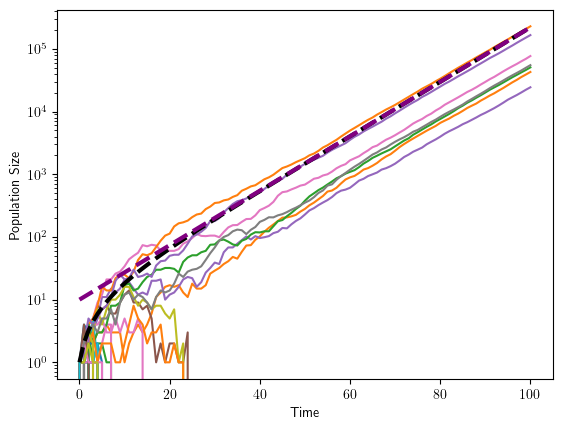

In [32]:
import random
import matplotlib.pyplot as plt


def simulate_branching_process(s, replicates, time_period):
    population_sizes = []
    
    for _ in range(replicates):
        population = [1]  # Start with one particle at time 0
        t = 0

        while t < time_period:
            new_population_size = np.random.poisson((1+s)*population[t])
            population.append(new_population_size)
            t += 1

        population_sizes.append(population)

    return population_sizes

s = 0.1
replicates = 50
time_period = 100

population_sizes = simulate_branching_process(s, replicates, time_period)

# Plotting the results
time_points = list(range(time_period + 1))

for i, population in enumerate(population_sizes):
    plt.plot(time_points, population)


t = np.linspace(start=0, stop=time_period, num=100)
y = 1+(np.exp(s*t)-1)/s 

yapprox = np.exp(s*t)/s 

plt.plot(t, y, color='black', linestyle='dashed', linewidth=3)
plt.plot(t, yapprox, color='purple', linestyle='dashed', linewidth=3)

plt.xlabel('Time')
plt.ylabel('Population Size')
plt.yscale("log")
plt.show()


## Appendix: Population size distribution

Thus far, we have derived the survival probability of the birth-death process, but we do not know the full probability distribution $p_n(t|\tau)$ that the population consists of $n$ individuals at time $t$.

But it turns out that an equation similar to the logistic equation can be derived for the moment generating function,

$$
G_x(t|\tau)\equiv \sum_{n=0}^{\infty} p_n(t|\tau) x^n \;,
$$

satisfies a logistic equation very similar to the survival probability. 

Retracing the steps from above, one can deduce that $G_x(t|\tau)$ in terms of $G_x(t|\tau-\epsilon)$,

$$ 
G_x(t|\tau-\epsilon)=\left[1-\epsilon (a+b)\right] G_x(t|\tau)+\epsilon b +\epsilon a G_x(t|\tau)^2 \;. 
$$  (generating-fct)

To explain the last term on the RHS, notice that, upon birth, we have two particles and that the two-particle generating function is just the square of the one particle generating function:

$$
\sum_{n=0}^{\infty} \sum_{m=0}^{n} z^{m} p_m(t|\tau) z^{n-m} p_{n-m}(t|\tau) =  \sum_{m=0}^{\infty} z^{m} p_m(t|\tau) \sum_{n-m=0}^{\infty} z^{n-m} p_{n-m}(t|\tau) =G_x(t|\tau)^2 \;.
$$
In the second step, we defined $p_{<0}(t|\tau)=0$.

In the continuous limit and after rescaling time, we find 
$$
-\partial_\tau G_x = -(2-s) G_x + G_x^2 +1-s
$$


First notice that we have a special solution $G_x^\infty\equiv G_x(t-\tau\to\infty)=(1-s)$, which simply corresponds to the fact that with probability $(1-s)$ the process goes extinct ($N(t)=0$).

Substituting $G_x(t)=G_x^\infty+g_x(t)$, we have to solve a logistic equation (again!)

$$
-\partial_\tau g_x = -s g_x + g_x^2
$$
subject to final condition $x=G_x(t)=g_x(t)+1-s$, i.e., $g_x(t)=s+x-1$, and the long-time limit $g_x(-\infty)=0$.

This logistic differential equation can be solved for $x\leq 1$ (indicating the radius of convergence) as above, yielding 

$$
G_x(t) = 1-s+\frac{s}{1+e^{s(t-\tau)}\frac{1-x}{s+x-1}}\;.
$$


A power series expansion returns the sought after abundance distribution, which for $\tau=0$ is given by

$$
    p_n(t)=\left\{\begin{array}{cc}
  & 
\begin{array}{cc}
 \frac{s^2 e^{s t}}{(e^{st}+s-1)(e^{st}-1)} \left(\frac{1-e^{-s t}}{1-(1-s)e^{-s t}}\right)^{n}  & n\geq 1 \\
 \frac{(1-s) \left(e^{s t}-1\right)}{e^{s t}+s-1} & n=0 \\
\end{array}
 \\
\end{array}\right.
$$  (abundance-pdf)

Notice that $p_0(t)=1-u(t)$ as expected.

Since the distribution is quite broad, one would like to know some characteristic features. The mean is given by 

$$
    \langle N(t) \rangle =\partial_x|_{x=1} G_x(t)=e^{st}
$$  (mean abundance)
which again is a sanity check.


From this result, we can now compute the probability distribution, given survival. This quantity is particularly relevant for $s t\ll 1$, where the population has established (with probability s or is extinct. In this limit, we find

$$
\Pr[N(t)=n|\text{survival}]=s^{-1}p_n(t)\sim s e^{-st-ns e^{-st}} 
$$ (conditioned-pdf)

This result is better interpreted by expressing the population size $n\equiv s^{-1} e^{s(t-\Delta)}$ in terms of an effective delay time $\Delta$ of the exponential growth period. The distribution {eq}`conditioned-pdf` implies that this delay time follows a universal extreme value distribution,

$$
\Pr[\Delta]\propto e^{-s\Delta- e^{s\Delta}} \;, 
$$

the Gumbel distribution.

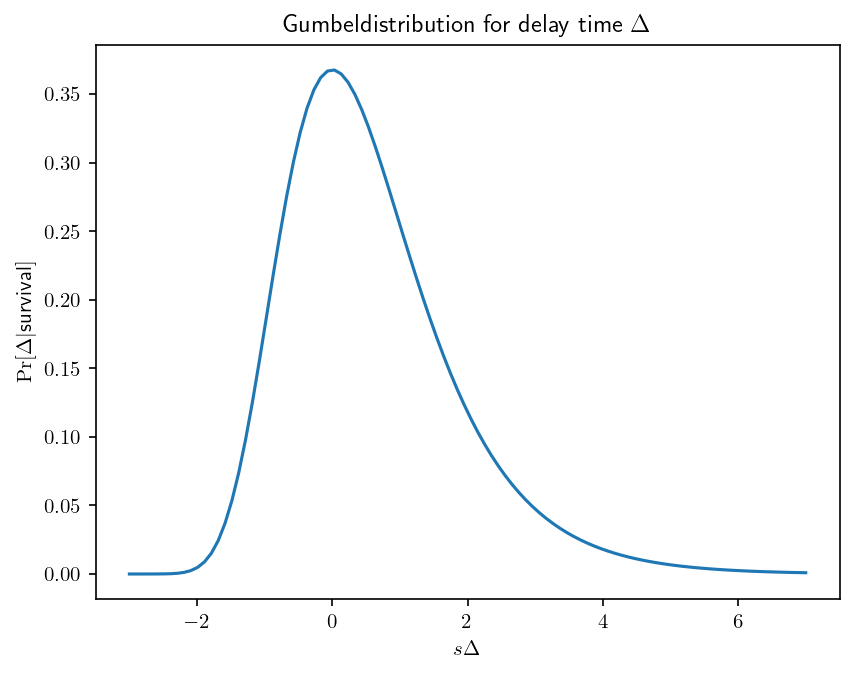

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# allow TeX
plt.rcParams['text.usetex'] = True
plt.figure(dpi=150)


t = np.linspace(start=-3, stop=7, num=100)
y = np.exp(-t-np.exp(-t)) 

# Add title and axis names
plt.title(r'Gumbeldistribution for delay time $\Delta$')
plt.xlabel(r'$s \Delta$')
plt.ylabel(r'$\Pr[\Delta|$survival$]$')


plt.plot(t, y)
plt.show()


## Citations


```{bibliography}
```